In [1]:
from os.path import abspath, join
import sys
from glob import glob 
import vaex
import numpy as np
root_dir = abspath(join('..', '..'))
root_data_dir = join(root_dir, 'Data')
sys.path.append(root_dir)
from utils import (mcmc, plot_chain, plot_corner, 
                   plot_fit_z, calculate_prob, 
                   get_params, get_data, style)

In [2]:
style()

In [3]:
z_dir_path = join(root_dir, 'Data', 'Effective-Volume-no')
w_dir_path = join(root_dir, 'Data', 'Velocity-Distribution-no')
phi_dir_path = join(root_dir, 'Data', 'PHI')
z_dir_path, w_dir_path, phi_dir_path

('/home2/s20321005/Thesis-Project/Data/Effective-Volume-no',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no',
 '/home2/s20321005/Thesis-Project/Data/PHI')

In [4]:
index = 0

result = mcmc() \
  .index(index) \
  .z_dir_path(z_dir_path) \
  .phi_dir_path(phi_dir_path) \
  .model("no") \
  .step0(100) \
  .step(200) \
  .thin(2) \
  .run(it=2)

result.keys()

running...
mcmc...


mcmc:   0%|          | 0/2 [00:00<?, ?it/s]

0: first half mcmc done 12.41 s


mcmc:  50%|█████     | 1/2 [00:24<00:24, 24.98s/it]

0: second half mcmc done 12.43 s
1: first half mcmc done 12.21 s


mcmc: 100%|██████████| 2/2 [00:49<00:00, 24.63s/it]

1: second half mcmc done 11.93 s


dict_keys(['indexes', 'labs', 'labels', 'chain'])

In [5]:
indexes, labs, labels, chain = result.values()
indexes, labs, labels

([12, 24, 25, 26],
 array(['rhob', 'log_nu0', 'R', 'zsun'], dtype='<U32'),
 array(['$\\rho_{b}$', '$\\log \\nu_0$', '$R$', '$z_{\\odot}$'],
       dtype='<U32'))

4it [00:01,  3.37it/s]


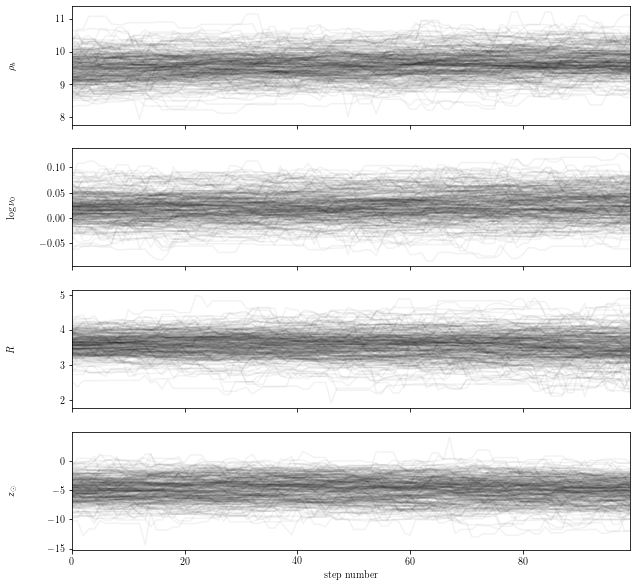

In [6]:
params = get_params(chain, indexes, labs)
plot_chain() \
  .params(params) \
  .labels(labels) \
  .alpha(0.05) \
  .run()

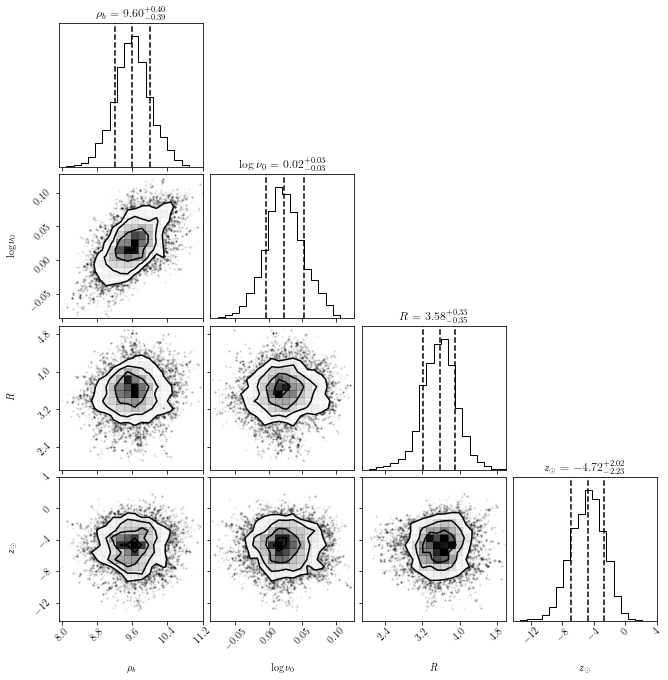

In [8]:
plot_corner() \
  .params(params) \
  .labels(labels) \
  .run()

In [9]:
ndim = chain.shape[2]
flat_sample = chain.reshape((-1, ndim))
zdata = get_data(z_dir_path, index, "z")
zmid = zdata[0]
zmax = np.max(np.abs(zmid))*2
flat_sample.shape

(27000, 27)

100%|██████████| 49/49 [00:18<00:00,  2.72it/s]


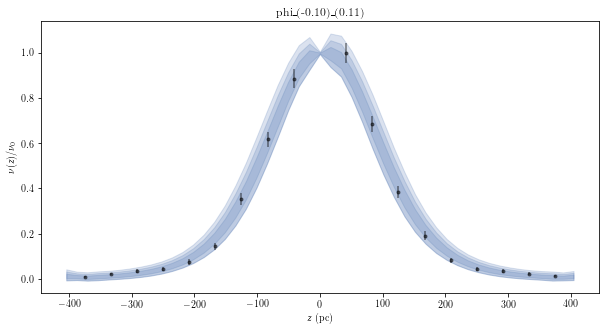

In [10]:
plot_fit_z() \
  .index(index) \
  .z_dir_path(z_dir_path) \
  .phi_dir_path(phi_dir_path)  \
  .flat(flat_sample) \
  .zmax(zmax) \
  .model("no") \
  .res(50) \
  .nsample(500) \
  .run()

In [12]:
ndim = chain.shape[2]
flat_sample = chain.reshape((-1, ndim))

calculate_prob() \
  .index(index) \
  .z_dir_path(z_dir_path) \
  .phi_dir_path(phi_dir_path) \
  .model("no")  \
  .flat(flat_sample) \
  .path("tes.txt") \
  .run()

running...
opening pred file...
opening phis file...
Calculating likelihood
max log-likelihood: 120.55625841073874
BIC: -37.93479667608085
AIC: -187.11251682147747


# Script

do mcmc for

* same $N$, different $z$
* same $z$, different $N$

Each 'running' contains
1. generate_init: initial position for walkers.
    * this is done by the experiment above.
2. run_mcmc: run true mcmc for 10_000 steps.
3. plot trace: plot trace plot for preliminary mcmc.
4. plot corner: plot corner plot for the long run.
5. plot fit: fitting plot for vertical density and vertical dispersion.
6. calculate bic & aic: calculate bic and aic for the long run.

All of these functionalities are implemented in `mcmc.py` at `utils`.

Just run the `program.py` at `script`.
To automate the process for all data, run `run_program.py` at `script`.

# Mock comparison

run mcmc but now for mock data comparison.

`Data/MCMC/dm_mock/mock/comp`

It contains mock data with different number of data points.
1000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000

This comparison is done to see the prediction power of the model.

The script for comparing also implemented in `script` folder.